In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [6]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
import xarray as xr
import h5py

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Helpful
import time
import datetime
import random

# My Methods
import importlib
import data.raw.load_data_raw as ldr
import data.processed.load_data_processed as ldp
import data.processed.load_data_processed_denormed as ldpd

<IPython.core.display.Javascript object>

In [7]:
importlib.reload(ldr)

<module 'data.raw.load_data_raw' from '/home/dchen/BA_CH_EN/data/raw/load_data_raw.py'>

<IPython.core.display.Javascript object>

### 0. Goals
Focus on 2018 as year should not be important for this visualization. Hopefully climate change ain't fast enough
1. Visualize Lead_time - Ensemble Values for all five variables for random coordinates and forecast_date --> x number of times






#### 1. Load Datasets

In [8]:
dat_train_norm = ldp.load_data_all_train_proc_norm()
dat_test_norm = ldp.load_data_all_test_proc_norm()
dat_train_denorm = ldpd.load_data_all_train_proc_denorm()
dat_test_denorm = ldpd.load_data_all_test_proc_denorm()
dat_raw = ldr.load_data_raw()

<IPython.core.display.Javascript object>

#### 2. Data preparation for Visualization

In [9]:
var_names = ["u10", "v10", "t2m", "t850", "z500"]

<IPython.core.display.Javascript object>

In [7]:
dat_arr_X = []
dat_arr_y = []
for i in range(5):
    dat_arr_X.append(dat_raw[0].predictions.isel(var=i))
    dat_arr_y.append(dat_raw[0].ground_truth.isel(var=i))

<IPython.core.display.Javascript object>

In [10]:
# Generate 3 random variables for lat, lon and forecast_date to visualize for
lat = random.randint(0, 119)  # both border-values included
lon = random.randint(0, 129)
forecast_date = random.randint(0, 356)

<IPython.core.display.Javascript object>

#### 3. Visualization

##### 3.1 Lead_time - Ensemble Values

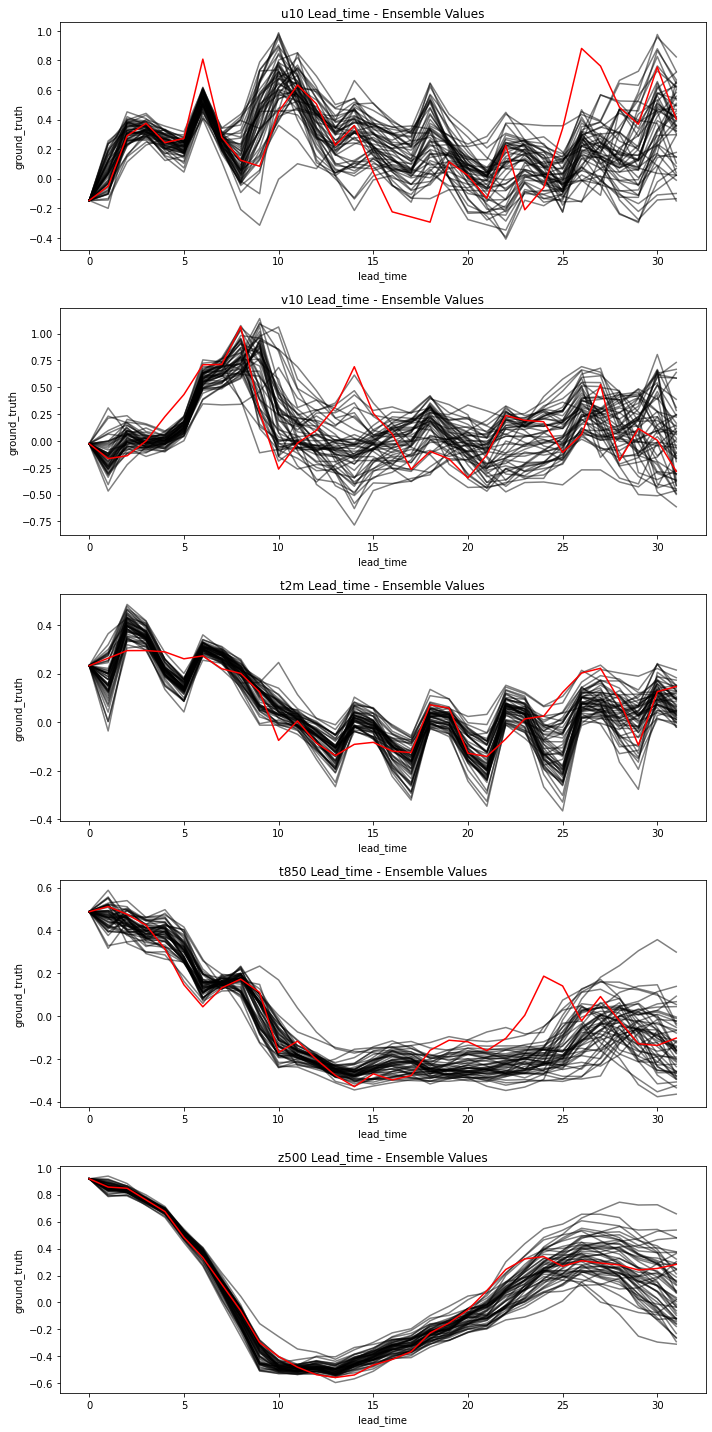

<IPython.core.display.Javascript object>

In [19]:
fig, axs = plt.subplots(ncols=1, nrows=5, figsize=(10, 20))
for i in range(5):
    dat_arr_X[i].isel(forecast_date=forecast_date, lat=lat, lon=lon).plot(
        x="lead_time", hue="ens", add_legend=False, ax=axs[i], color="black", alpha=0.5
    )
    dat_arr_y[i].isel(forecast_date=forecast_date, lat=lat, lon=lon).plot(
        x="lead_time", ax=axs[i], color="red"
    )
    axs[i].set_title(var_names[i] + " Lead_time - Ensemble Values")
plt.tight_layout()
plt.show()

##### 3.2 Lead_time - ens_std

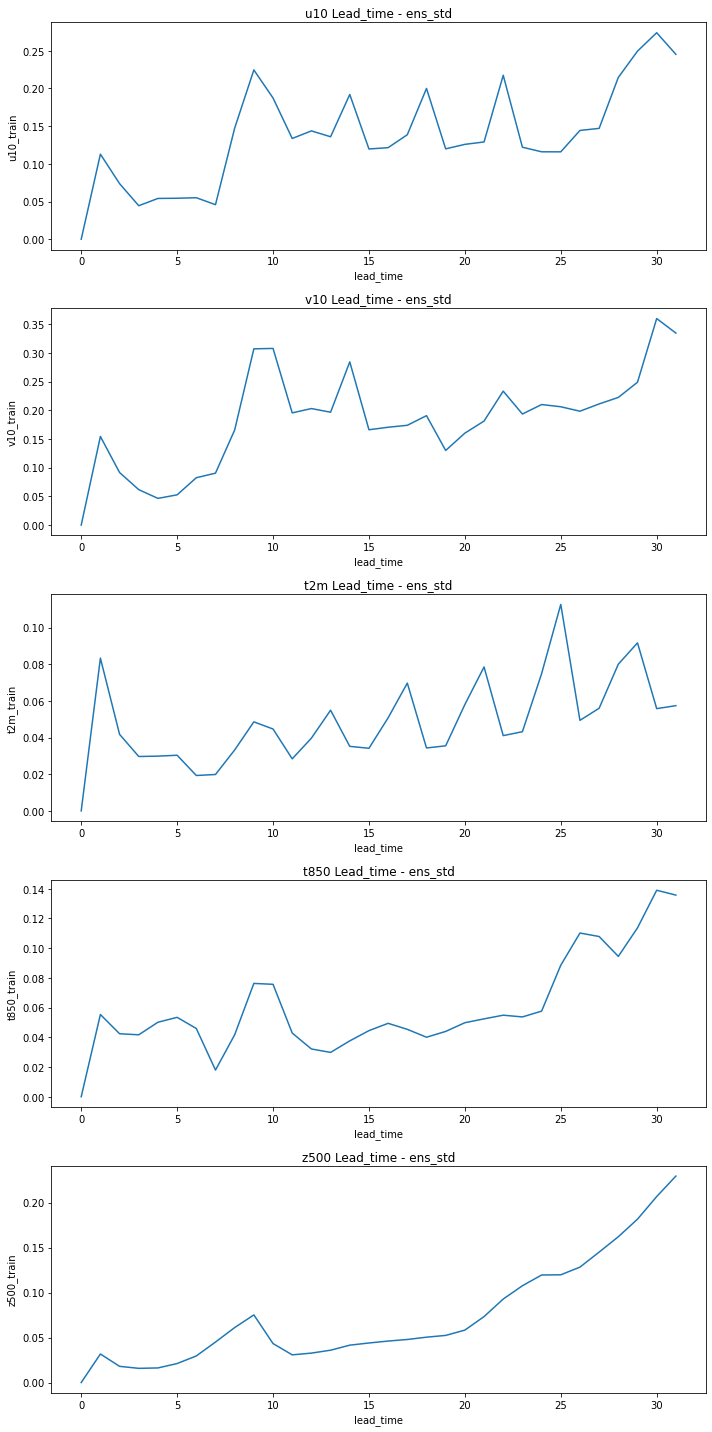

<IPython.core.display.Javascript object>

In [12]:
fig, axs = plt.subplots(ncols=1, nrows=5, figsize=(10, 20))
for i in range(5):
    dat_train_proc[i][var_names[i] + "_train"].isel(
        forecast_date=forecast_date, lat=lat, lon=lon, mean_std=1
    ).plot(x="lead_time", ax=axs[i])
    axs[i].set_title(var_names[i] + " Lead_time - ens_std")
plt.tight_layout()
plt.show()